# Import plaintext

In [63]:
import pathlib
import numpy as np
pt = []
for path in pathlib.Path("../../Downloads/picoaes_tsmc_180_100_128pc_ckey/ciphers").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        #print(current_file.read())
        a = current_file.readline()[27:59]
        pt.append(a)
        current_file.close()
pt.sort()

In [64]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)

In [65]:
len(pt_array)

512

# Import key

In [66]:
key = []
for path in pathlib.Path("../../Downloads/picoaes_tsmc_180_100_128pc_ckey/ciphers").iterdir():
    if path.is_file():
        current_file = open(path, "r")
        #print(current_file.read())
        next(current_file)
        a = current_file.readline()[21:53]
        key.append(a)
        current_file.close()
key.sort()

In [67]:
key_array = []
for i in range (len(key)):
    b = bytes.fromhex(key[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    key_array.append(one_array)

In [68]:
len(key_array)

512

# Import traces

In [69]:
import glob
import matplotlib.pylab as plt
NumofTraces = 512
strx = []
stry = []
floatx = []
floaty = []
path = "../../Downloads/picoaes_tsmc_180_100_128pc_ckey/gate/*.data"
#path = "../../Downloads/pico_coaes_512/gate/picoaes_tsmc180_200_sca_trace_0_plot.png.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-28:]): #-19:-14 for 512
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            row = line.split()
            strx.append(row[-2])
            stry.append(row[-1])
for i in range (len(strx)):
    floatx.append(float(strx[i]))
    floaty.append(float(stry[i]))
floatx = np.hstack(floatx)
floaty = np.hstack(floaty)
trace_array_x = np.array_split(floatx, NumofTraces)
trace_array_y = np.array_split(floaty, NumofTraces)

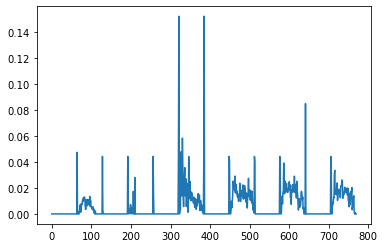

In [70]:
plt.plot(trace_array_y[0])

In [71]:
len(trace_array_y)

512

In [72]:
N=380

In [73]:
pt_array = pt_array[0:N]
key_array = key_array[0:N]
trace_array_y = trace_array_y[0:N]
print(len(pt_array))
print(len(key_array))
print(len(trace_array_y))

380
380
380


In [74]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

In [96]:
HW = [bin(n).count("1") for n in range(0, 256)]

numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

def calculate_diffs(guess, byteindex):

    one_list_calc = []
    zero_list_calc = []

    for trace_index in range(len(trace_array_y)):
        #hypothetical_leakage = intermediate(guess, pt_array[trace_index][byteindex])
        st1 = pt_array[trace_index][byteindex] ^ guess
        st2 = sbox[st1]
        hypothetical_leakage = st1 ^ st2

        if (HW[hypothetical_leakage] > 4 ):
            one_list_calc.append(trace_array_y[trace_index])
        elif (HW[hypothetical_leakage] < 4):
            zero_list_calc.append(trace_array_y[trace_index])

    one_avg_calc = np.asarray(one_list_calc).mean(axis=0)
    zero_avg_calc = np.asarray(zero_list_calc).mean(axis=0)
    return abs(one_avg_calc - zero_avg_calc)

In [97]:
from tqdm.notebook import trange
key_guess = []
full_diffs_list = []
known_key = [0x00, 0x11, 0x22, 0x33, 0x44, 0x55, 0x66, 0x77, 0x88, 0x99, 0xaa, 0xbb, 0xcc, 0xdd, 0xee, 0xff]

for subkey in trange(0, 16):
    max_diffs = [0]*256
    full_diffs = [0]*256
    for guess in trange(0, 256):
        full_diff_trace = calculate_diffs(guess, subkey)
        max_diffs[guess] = np.max(full_diff_trace)
        full_diffs[guess] = full_diff_trace
        
    #Make copy of the list
    full_diffs_list.append(full_diffs[:])

    #Get argument sort, as each index is the actual key guess.
    sorted_args = np.argsort(max_diffs)[::-1]

    #Keep most likely
    key_guess.append(sorted_args[0])

    #Print results
    print("Subkey %2d - most likely %02X (actual %02X)"%(subkey, key_guess[subkey], known_key[subkey]))

    #Print other top guesses
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, max_diffs[g]))

    print("\n")

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 00 (actual 00)
 Top 5 guesses: 
   00 - Diff = 0.003636
   D1 - Diff = 0.002564
   52 - Diff = 0.002415
   8F - Diff = 0.002399
   1F - Diff = 0.002350




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 11 (actual 11)
 Top 5 guesses: 
   11 - Diff = 0.003929
   5F - Diff = 0.003100
   CD - Diff = 0.002882
   78 - Diff = 0.002817
   5E - Diff = 0.002616




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 22 (actual 22)
 Top 5 guesses: 
   22 - Diff = 0.005176
   BE - Diff = 0.002717
   8B - Diff = 0.002573
   E9 - Diff = 0.002529
   4A - Diff = 0.002497




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely 33 (actual 33)
 Top 5 guesses: 
   33 - Diff = 0.006426
   21 - Diff = 0.002611
   9B - Diff = 0.002541
   6C - Diff = 0.002497
   E5 - Diff = 0.002426




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  4 - most likely 44 (actual 44)
 Top 5 guesses: 
   44 - Diff = 0.005221
   6A - Diff = 0.002650
   D8 - Diff = 0.002601
   3F - Diff = 0.002590
   8B - Diff = 0.002465




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  5 - most likely 55 (actual 55)
 Top 5 guesses: 
   55 - Diff = 0.003985
   9F - Diff = 0.002690
   86 - Diff = 0.002641
   96 - Diff = 0.002607
   1D - Diff = 0.002546




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  6 - most likely 66 (actual 66)
 Top 5 guesses: 
   66 - Diff = 0.005764
   D4 - Diff = 0.002758
   7F - Diff = 0.002687
   92 - Diff = 0.002628
   EE - Diff = 0.002571




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  7 - most likely 77 (actual 77)
 Top 5 guesses: 
   77 - Diff = 0.005861
   E0 - Diff = 0.002755
   44 - Diff = 0.002669
   F0 - Diff = 0.002554
   E9 - Diff = 0.002442




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  8 - most likely 88 (actual 88)
 Top 5 guesses: 
   88 - Diff = 0.002719
   D3 - Diff = 0.002693
   86 - Diff = 0.002443
   82 - Diff = 0.002315
   16 - Diff = 0.002295




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  9 - most likely 99 (actual 99)
 Top 5 guesses: 
   99 - Diff = 0.005003
   2A - Diff = 0.002591
   77 - Diff = 0.002589
   0E - Diff = 0.002486
   0F - Diff = 0.002434




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 10 - most likely AA (actual AA)
 Top 5 guesses: 
   AA - Diff = 0.003732
   5C - Diff = 0.002565
   9C - Diff = 0.002430
   32 - Diff = 0.002372
   DF - Diff = 0.002346




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 11 - most likely BB (actual BB)
 Top 5 guesses: 
   BB - Diff = 0.003929
   2D - Diff = 0.002741
   E2 - Diff = 0.002709
   C5 - Diff = 0.002492
   8D - Diff = 0.002451




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 12 - most likely 47 (actual CC)
 Top 5 guesses: 
   47 - Diff = 0.002722
   82 - Diff = 0.002512
   F2 - Diff = 0.002454
   8C - Diff = 0.002453
   7D - Diff = 0.002398




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 13 - most likely 1C (actual DD)
 Top 5 guesses: 
   1C - Diff = 0.002941
   BD - Diff = 0.002621
   26 - Diff = 0.002536
   1F - Diff = 0.002489
   3D - Diff = 0.002429




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 14 - most likely 3C (actual EE)
 Top 5 guesses: 
   3C - Diff = 0.002639
   E4 - Diff = 0.002410
   8F - Diff = 0.002405
   75 - Diff = 0.002394
   1D - Diff = 0.002324




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey 15 - most likely 43 (actual FF)
 Top 5 guesses: 
   43 - Diff = 0.002686
   BE - Diff = 0.002633
   9A - Diff = 0.002631
   46 - Diff = 0.002519
   1F - Diff = 0.002472




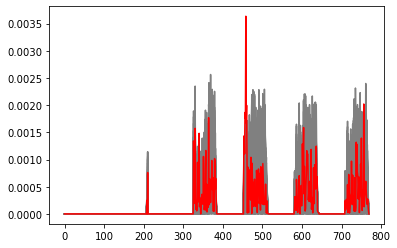

In [77]:
correct_key = 0 # 0x00
bnum = 0
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

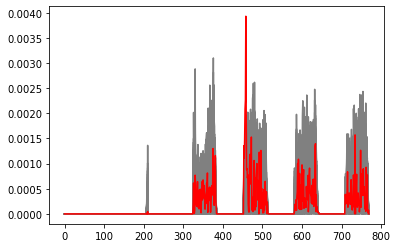

In [78]:
correct_key = 17 # 0x11
bnum = 1
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

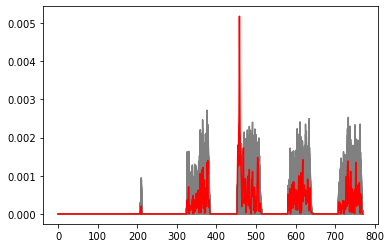

In [79]:
correct_key = 34 # 0x22
bnum = 2
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

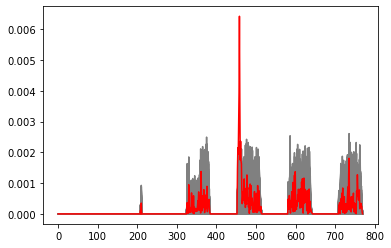

In [80]:
correct_key = 51 # 0x33
bnum = 3
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

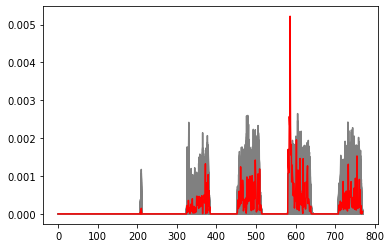

In [81]:
correct_key = key_array[0][4] # 0x44
bnum = 4
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

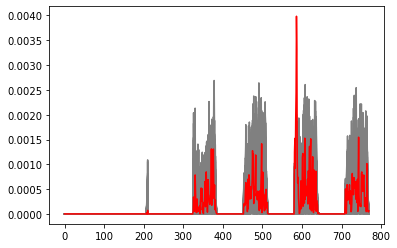

In [82]:
correct_key = key_array[0][5] # 0x55
bnum = 5
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

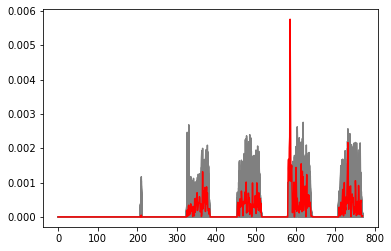

In [83]:
correct_key = key_array[0][6] # 0x66
bnum = 6
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

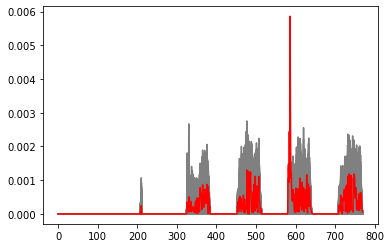

In [84]:
correct_key = key_array[0][7] # 0x77
bnum = 7
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

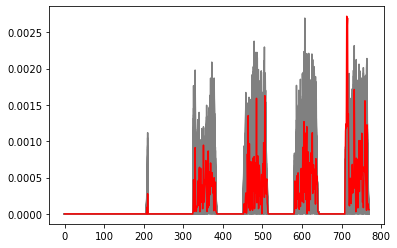

In [85]:
correct_key = key_array[0][8] # 0x00
bnum = 8
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

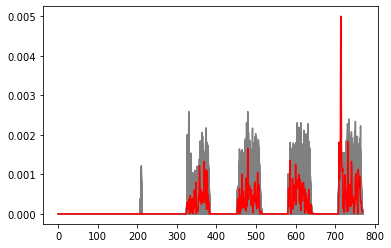

In [86]:
correct_key = key_array[0][9] # 0x00
bnum = 9
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

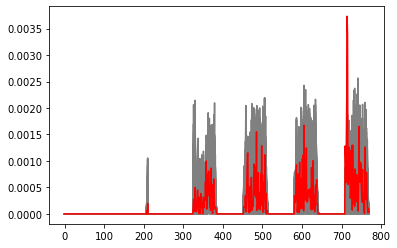

In [87]:
correct_key = key_array[0][10] # 0x00
bnum = 10
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

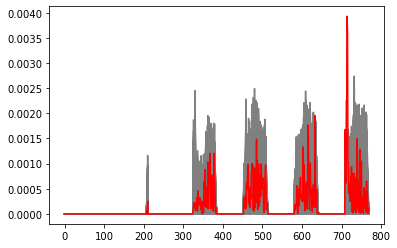

In [88]:
correct_key = key_array[0][11] # 0x00
bnum = 11
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

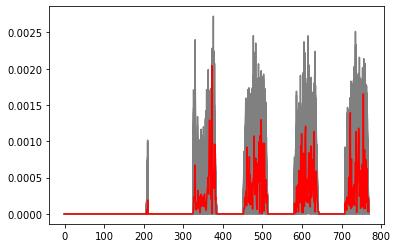

In [89]:
correct_key = key_array[0][12] # 0x00
bnum = 12
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

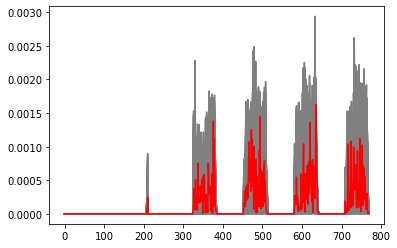

In [90]:
correct_key = key_array[0][13] # 0x00
bnum = 13
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

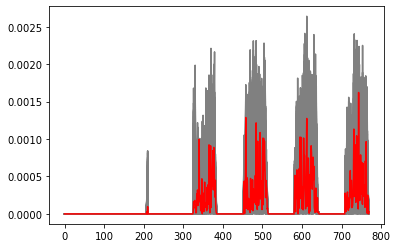

In [91]:
correct_key = key_array[0][14] # 0x00
bnum = 14
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

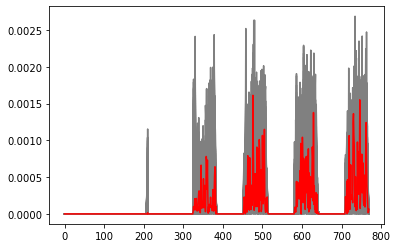

In [92]:
correct_key = key_array[0][15] # 0x00
bnum = 15
plt.figure()
for i in range(0, len(full_diffs_list[bnum])):
    if (i == correct_key):
        plt.plot(abs(full_diffs_list[bnum][i]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(full_diffs_list[bnum][i]),color="grey")
plt.show()

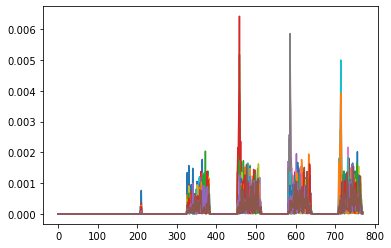

In [93]:
plt.figure()
for subkey in range(0, 16):
    plt.plot(full_diffs_list[subkey][known_key[subkey]])
plt.show()